<a href="https://colab.research.google.com/github/GIGAParviz/Cifa10-Predictions/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras import layers

In [ ]:
(x_train0, y_train0), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train , x_val , y_train , y_val = train_test_split(x_train0 , y_train0)



x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

# scaler = StandardScaler()


# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_val = scaler.transform(x_val)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(37500, 32, 32, 3)

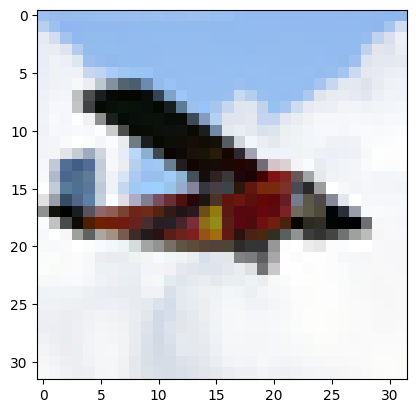

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train.shape

(37500, 1)

In [ ]:
x_train.shape

(37500, 32, 32, 3)

In [ ]:
init = keras.initializers.LecunNormal()

model = keras.Sequential()
model.add(layers.Flatten(input_shape=[32 ,32 ,3]))
model.add(layers.Dense(150 , activation='selu' , bias_initializer='zero' , kernel_initializer=init))
model.add(layers.Dense(150 , activation='selu' ))
model.add(layers.Dense(100 , activation='selu'))
model.add(layers.AlphaDropout(rate=0.2))
model.add(layers.Dense(10 , activation='softmax'))


In [ ]:
model.weights

In [ ]:
calb  = keras.callbacks.EarlyStopping(patience=5 ,restore_best_weights=True)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
c = keras.callbacks.LearningRateScheduler(scheduler)

rmsporp = keras.optimizers.RMSprop(momentum=0.2)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='nadam',
    metrics='accuracy'
)

In [ ]:
h = model.fit(x_train , y_train , validation_data=(x_val , y_val) , epochs=100)

In [ ]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.0981 - accuracy: 0.5089


[3.0981428623199463, 0.508899986743927]

In [ ]:
pre = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
classes=np.argmax(pre , axis=1)
print(classification_report(classes,y_test))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1160
           1       0.60      0.64      0.62       938
           2       0.41      0.41      0.41      1002
           3       0.40      0.33      0.36      1224
           4       0.36      0.48      0.41       764
           5       0.39      0.42      0.41       933
           6       0.57      0.57      0.57      1010
           7       0.56      0.56      0.56      1012
           8       0.61      0.64      0.62       953
           9       0.57      0.57      0.57      1004

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [ ]:
confusion_matrix(classes , y_test)

array([[612,  57,  97,  32,  52,  29,  17,  48, 149,  67],
       [ 29, 603,   9,  12,  15,   8,  15,  19,  66, 162],
       [ 61,  22, 408,  90, 173,  79,  72,  62,  18,  17],
       [ 41,  31, 128, 399,  86, 250, 144,  78,  35,  32],
       [ 29,  12,  90,  52, 363,  50,  67,  59,  27,  15],
       [ 14,  16,  78, 186,  69, 392,  54,  84,  13,  27],
       [ 13,  15,  87,  94, 112,  59, 574,  29,   8,  19],
       [ 36,  30,  62,  63,  95,  78,  27, 563,  20,  38],
       [110,  62,  26,  31,  19,  23,  15,   7, 606,  54],
       [ 55, 152,  15,  41,  16,  32,  15,  51,  58, 569]])

# **Convoluntional Neural**

In [ ]:
images = x_train[:2 ,: ,:,:]

In [ ]:
images.shape

(2, 32, 32, 3)

In [ ]:
filters = np.zeros((5,5,3,2))
filters[: , 2 , : , 0]=1
filters[2, : , : , 1]=1

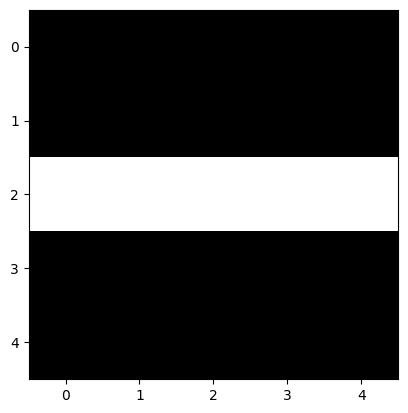

In [ ]:
plt.imshow(filters[:,:,:,1])

In [ ]:
convolved = tf.nn.conv2d(images , filters , padding='SAME' , strides=1)

In [ ]:
pooled = keras.layers.MaxPooling2D(images , strides=(2,2))

ValueError: ignored

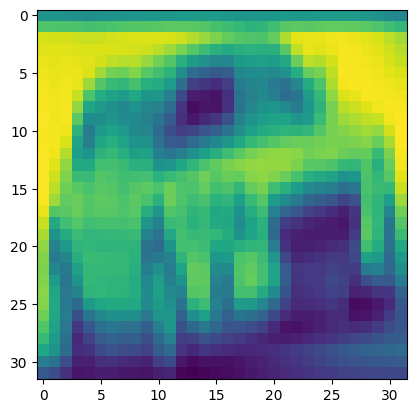

In [ ]:
plt.imshow(convolved[1,:,:,0])

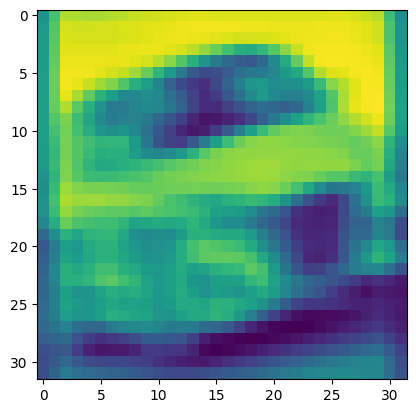

In [ ]:
plt.imshow(convolved[1,:,:,1])

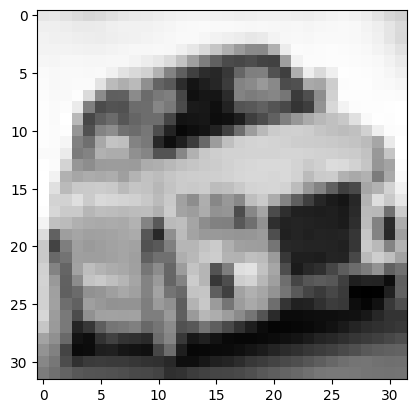

In [ ]:
plt.imshow(x_train[1 ,: ,: ,0] , cmap='gray')

In [ ]:
model = keras.models.Sequential([
  keras.layers.Conv2D(50 , 5 , activation='relu' , padding='same', input_shape=[32,32,3]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(100 , 3 , activation='relu' , padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(200 , 3 , activation='relu' , padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(100 , activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(50 , activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(10 , activation='softmax')
])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [ ]:
h = model.fit(x_train , y_train , validation_data=(x_val , y_val) , epochs=50)

Epoch 1/50
1172/1172 [==============================] - 21s 7ms/step - loss: 1.9139 - accuracy: 0.2754 - val_loss: 1.5147 - val_accuracy: 0.4534
Epoch 2/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5275 - accuracy: 0.4459 - val_loss: 1.3356 - val_accuracy: 0.5382
Epoch 3/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.3483 - accuracy: 0.5209 - val_loss: 1.1578 - val_accuracy: 0.5823
Epoch 4/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.2171 - accuracy: 0.5733 - val_loss: 1.1058 - val_accuracy: 0.6046
Epoch 5/50
1172/1172 [==============================] - 13s 11ms/step - loss: 1.1144 - accuracy: 0.6143 - val_loss: 1.0494 - val_accuracy: 0.6317
Epoch 6/50
1172/1172 [==============================] - 12s 11ms/step - loss: 1.0339 - accuracy: 0.6447 - val_loss: 0.9790 - val_accuracy: 0.6605
Epoch 7/50
1172/1172 [==============================] - 13s 11ms/step - loss: 0.9558 - accuracy: 0.6690 - val_loss: 0.9421 - val_ac

In [ ]:
tf.keras.utils.plot_model(model , show_shapes=True , expand_nested=True , show_layer_activations=True, show_dtype=True , show_trainable=True)

AttributeError: ignored

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6953 - accuracy: 0.7071


[1.6952999830245972, 0.707099974155426]

In [ ]:
pre = model.predict(x_test)
pre

313/313 [==============================] - 1s 2ms/step


array([[1.3688357e-03, 3.0474345e-07, 4.8286741e-04, ..., 2.6375777e-03,
        2.8338925e-05, 5.5679270e-06],
       [4.0281285e-09, 8.5522431e-01, 7.3120653e-20, ..., 1.8131617e-25,
        1.4477567e-01, 4.4335813e-08],
       [1.3886488e-04, 1.1022216e-05, 3.0140237e-07, ..., 9.8397790e-10,
        9.9967229e-01, 1.7311366e-05],
       ...,
       [2.5039029e-07, 9.9844955e-10, 6.0295137e-03, ..., 4.9108284e-04,
        7.3972065e-11, 7.3318235e-10],
       [5.9464783e-06, 9.9901021e-01, 1.0276400e-08, ..., 2.0768326e-08,
        8.0836975e-07, 9.8008662e-04],
       [4.8780213e-30, 9.9119451e-35, 4.5607324e-29, ..., 1.0000000e+00,
        0.0000000e+00, 1.7100637e-28]], dtype=float32)

In [ ]:
pre = np.argmax(model.predict(x_test).round(3) , axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pre

array([5, 1, 8, ..., 5, 1, 7])

In [ ]:
(y_test)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(pre , y_test))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1020
           1       0.90      0.75      0.82      1189
           2       0.56      0.67      0.61       836
           3       0.52      0.46      0.49      1135
           4       0.63      0.64      0.63       992
           5       0.59      0.64      0.61       934
           6       0.77      0.78      0.78       986
           7       0.76      0.75      0.75      1009
           8       0.83      0.84      0.84       986
           9       0.75      0.82      0.78       913

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
confusion_matrix(pre , y_test)

array([[768,  12,  71,  25,  34,  12,   8,  17,  44,  29],
       [ 35, 895,  11,  15,  12,  11,  16,   5,  51, 138],
       [ 42,   2, 558,  53,  58,  36,  40,  27,   7,  13],
       [ 20,   7, 117, 518,  96, 199,  79,  53,  24,  22],
       [ 15,   4,  85,  81, 630,  55,  36,  72,   7,   7],
       [  3,   0,  46, 173,  36, 594,  26,  47,   5,   4],
       [  7,   4,  54,  62,  49,  25, 774,   3,   4,   4],
       [ 16,   3,  39,  38,  74,  50,   9, 755,   7,  18],
       [ 65,  17,  11,  14,   9,  10,   8,   2, 832,  18],
       [ 29,  56,   8,  21,   2,   8,   4,  19,  19, 747]])

In [ ]:
model.evaluate(x_val , y_val)

391/391 [==============================] - 2s 4ms/step - loss: 1.3901 - accuracy: 0.7076


[1.390075922012329, 0.7075999975204468]

# **Xception Model**

In [ ]:
from keras import layers
from tensorflow import keras
from keras.layers import Conv2D as conv , MaxPooling2D as max , Dense as dn
from keras.applications import Xception

In [ ]:
xc = keras.applications.Xception(include_top=False)

In [ ]:
for layer in (xc.layers):
  layer.trainable = False

# xc.summary()

In [ ]:
ga = keras.layers.GlobalAveragePooling2D()(xc.output)
output = dn(10 , activation='softmax')(ga)
model = keras.Model(inputs=[xc.input] , outputs=[output])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train , y_train , epochs=30 , validation_split=0.3)